In [1]:
# Read the file: Austin_weather.csv
# Explore the data...
# Identify weird stuff inside this data

import pandas as pd

weather=pd.read_csv("austin_weather.csv")
weather

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [2]:
weather.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [3]:
weather["DewPointHighF"].unique()

array(['67', '43', '31', '36', '44', '39', '41', '49', '51', '37', '55',
       '54', '15', '29', '60', '64', '58', '28', '42', '22', '38', '45',
       '19', '59', '62', '40', '17', '53', '34', '48', '52', '61', '63',
       '33', '57', '65', '46', '32', '50', '27', '56', '47', '68', '69',
       '66', '70', '73', '71', '76', '72', '75', '74', '-', '77', '23',
       '35', '30', '79', '78', '80', '26', '18', '25', '13'], dtype=object)

In [4]:
weather["DewPointHighF"].value_counts()["-"]

7

In [5]:
import numpy as np
no_more_dashes=weather["DewPointHighF"].replace("-",-9999).apply( lambda data : int(data) )
no_more_dashes=weather["DewPointHighF"].replace("-",np.NaN).apply( lambda data : float(data) )
no_more_dashes

0       67.0
1       43.0
2       31.0
3       36.0
4       44.0
        ... 
1314    71.0
1315    71.0
1316    72.0
1317    70.0
1318    66.0
Name: DewPointHighF, Length: 1319, dtype: float64

In [6]:
def fixNumbers(column):
    weather[column]= weather[column].replace("-",np.NaN).replace("T",np.NaN).apply( lambda data : float(data) )

for each_column in weather.loc[ : , "TempHighF":"PrecipitationSumInches" ].columns:
    fixNumbers(each_column)
    
weather['Date']=pd.to_datetime(weather['Date'])


In [7]:
weather

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74.0,60.0,45.0,67.0,49.0,43.0,93.0,75.0,57.0,...,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm"
1,2013-12-22,56.0,48.0,39.0,43.0,36.0,28.0,93.0,68.0,43.0,...,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00,
2,2013-12-23,58.0,45.0,32.0,31.0,27.0,23.0,76.0,52.0,27.0,...,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00,
3,2013-12-24,61.0,46.0,31.0,36.0,28.0,21.0,89.0,56.0,22.0,...,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00,
4,2013-12-25,58.0,50.0,41.0,44.0,40.0,36.0,86.0,71.0,56.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103.0,89.0,75.0,71.0,67.0,61.0,82.0,54.0,25.0,...,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,0.00,
1315,2017-07-28,105.0,91.0,76.0,71.0,64.0,55.0,87.0,54.0,20.0,...,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,0.00,
1316,2017-07-29,107.0,92.0,77.0,72.0,64.0,55.0,82.0,51.0,19.0,...,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,0.00,
1317,2017-07-30,106.0,93.0,79.0,70.0,68.0,63.0,69.0,48.0,27.0,...,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,0.00,


In [8]:
weather["Events"].unique()

array(['Rain , Thunderstorm', ' ', 'Rain', 'Fog', 'Rain , Snow',
       'Fog , Rain', 'Thunderstorm', 'Fog , Rain , Thunderstorm',
       'Fog , Thunderstorm'], dtype=object)

In [9]:
weather["Events"].value_counts()

                             903
Rain                         192
Rain , Thunderstorm          137
Fog , Rain , Thunderstorm     33
Fog                           21
Thunderstorm                  17
Fog , Rain                    14
Rain , Snow                    1
Fog , Thunderstorm             1
Name: Events, dtype: int64

In [10]:
items=[]

for each_combination in weather["Events"].unique():
    for each_item in each_combination.split(","):
        items.append(each_item.strip())

items.remove("")        

#for each_column_name in pd.DataFrame(items)[0].unique():
#    print(each_column_name)

In [11]:
import re

#for event in ("Rain","Snow","Fog","Thunderstorm"):
for event in pd.DataFrame(items)[0].unique():
    weather[event]=weather["Events"].apply( lambda event_combination: bool(re.search(event,event_combination))  )

In [12]:
weather[weather['Rain']]["TempHighF"].mean()

76.14854111405836

In [13]:
weather[weather['Rain']]

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,Rain,Thunderstorm,Fog,Snow
0,2013-12-21,74.0,60.0,45.0,67.0,49.0,43.0,93.0,75.0,57.0,...,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm",True,True,False,False
18,2014-01-08,53.0,47.0,40.0,51.0,45.0,30.0,93.0,75.0,57.0,...,1.0,12.0,1.0,18.0,0.16,Rain,True,False,False,False
20,2014-01-10,72.0,65.0,57.0,64.0,61.0,54.0,93.0,81.0,68.0,...,1.0,13.0,6.0,21.0,0.10,Rain,True,False,False,False
22,2014-01-12,67.0,57.0,46.0,58.0,47.0,33.0,84.0,68.0,52.0,...,10.0,15.0,4.0,24.0,0.01,Rain,True,False,False,False
33,2014-01-23,56.0,42.0,27.0,42.0,29.0,20.0,78.0,64.0,50.0,...,2.0,20.0,9.0,31.0,0.06,"Rain , Snow",True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,2017-07-07,99.0,87.0,75.0,74.0,71.0,65.0,88.0,61.0,33.0,...,10.0,15.0,3.0,27.0,0.02,"Rain , Thunderstorm",True,True,False,False
1302,2017-07-15,103.0,87.0,71.0,73.0,70.0,63.0,100.0,65.0,29.0,...,2.0,23.0,3.0,35.0,0.16,"Rain , Thunderstorm",True,True,False,False
1304,2017-07-17,98.0,88.0,77.0,75.0,71.0,66.0,88.0,63.0,38.0,...,10.0,16.0,3.0,23.0,NaN,"Rain , Thunderstorm",True,True,False,False
1310,2017-07-23,103.0,90.0,77.0,74.0,71.0,66.0,85.0,58.0,31.0,...,2.0,13.0,4.0,24.0,0.04,"Rain , Thunderstorm",True,True,False,False


In [14]:
# Create a pie chart representing whether it was raining or not.
import matplotlib.pyplot as plt


<AxesSubplot:ylabel='Rain'>

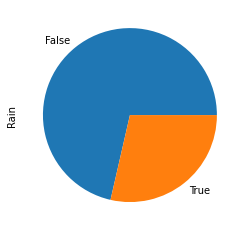

In [18]:
weather['Rain'].value_counts().plot.pie()

<AxesSubplot:>

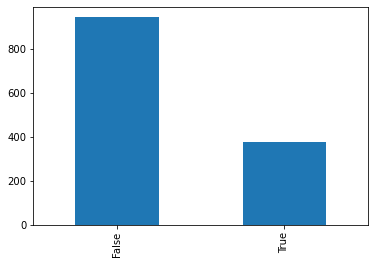

In [19]:
weather['Rain'].value_counts().plot.bar()

<AxesSubplot:>

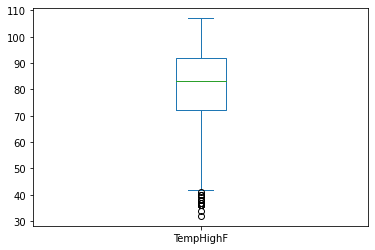

In [21]:
weather['TempHighF'].plot.box()

<AxesSubplot:>

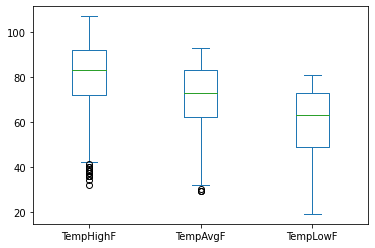

In [22]:
weather.loc[:, "TempHighF":"TempLowF" ].plot.box()

<AxesSubplot:>

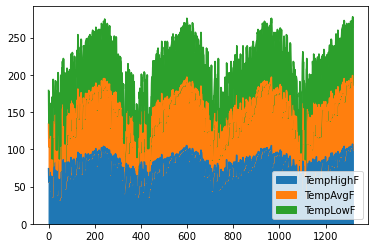

In [23]:
weather.loc[:, "TempHighF":"TempLowF" ].plot.area()

<AxesSubplot:xlabel='DewPointAvgF', ylabel='HumidityAvgPercent'>

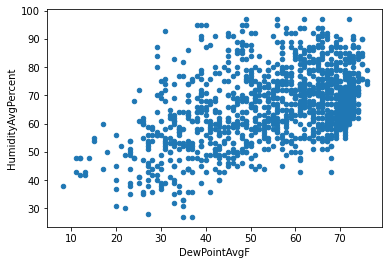

In [24]:
weather.plot.scatter( x="DewPointAvgF", y= "HumidityAvgPercent")
